### Importing all the necessary Libraries 

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### Loading The Data

In [43]:
customers = pd.read_csv('Users/saumyajha/Desktop/Customers.csv')
transactions = pd.read_csv('Users/saumyajha/Desktop/Transactions.csv')


### Merging the datasets 

In [42]:
data = pd.merge(customers, transactions, on='CustomerID')



### Feature Engineeringg 

In [44]:
 
data['TotalSpend'] = data.groupby('CustomerID')['TotalValue'].transform('sum')
data['TransactionCount'] = data.groupby('CustomerID')['TransactionID'].transform('count')
features = data[['TotalSpend', 'TransactionCount']]

### Normalize the data

In [45]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Clustering the data

In [46]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters


### Clustering the metrics 

In [47]:
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette = silhouette_score(scaled_features, clusters)


In [48]:
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")

Davies-Bouldin Index: 0.9810201049342082
Silhouette Score: 0.3361300602344958


# Visualization

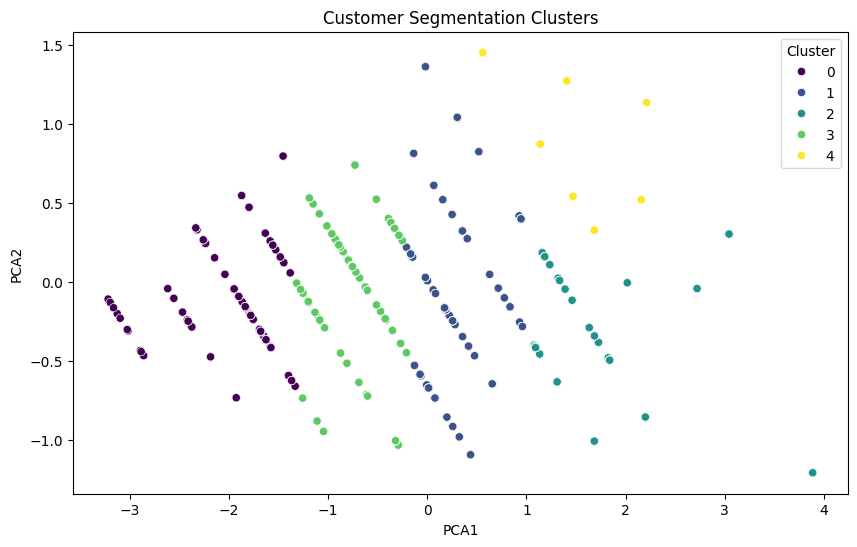

In [50]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
data['PCA1'], data['PCA2'] = pca_features[:, 0], pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.show()



